# **Egyptian Premier League Analysis (NTI Final Project)** </br>2000 to 2024
*By: Mahmoud Ahmed Shimy*

11/2024
____
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---
## Reading Datasets

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Self study/Internships/NTI/NTI_creativa/Tasks/Mahmoud Ahmed Shimy/Week 8 Graduation Project/egyptian league 2000-2022.csv')

In [3]:
df2 = pd.read_excel("/content/drive/MyDrive/Self study/Internships/NTI/NTI_creativa/Tasks/Mahmoud Ahmed Shimy/Week 8 Graduation Project/db.xlsx")

In [4]:
# Merging 2 datasets
df = pd.concat([df1, df2], ignore_index=True)

---
## Data Assessing

In [5]:
df.sample()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
157,2010-11,10,Petrojet,30,9,8,13,31,38,-7,35,Not Applicable


In [6]:
df.columns

Index(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Qualification or relegation'],
      dtype='object')

Seems like some column names needs to be fixed

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       346 non-null    object
 1   Pos                          346 non-null    int64 
 2   Team                         346 non-null    object
 3   Pld                          346 non-null    int64 
 4   W                            346 non-null    int64 
 5   D                            346 non-null    int64 
 6   L                            346 non-null    int64 
 7   GF                           346 non-null    int64 
 8   GA                           346 non-null    int64 
 9   GD                           346 non-null    int64 
 10  Pts                          346 non-null    int64 
 11  Qualification or relegation  335 non-null    object
dtypes: int64(9), object(3)
memory usage: 32.6+ KB


<Axes: >

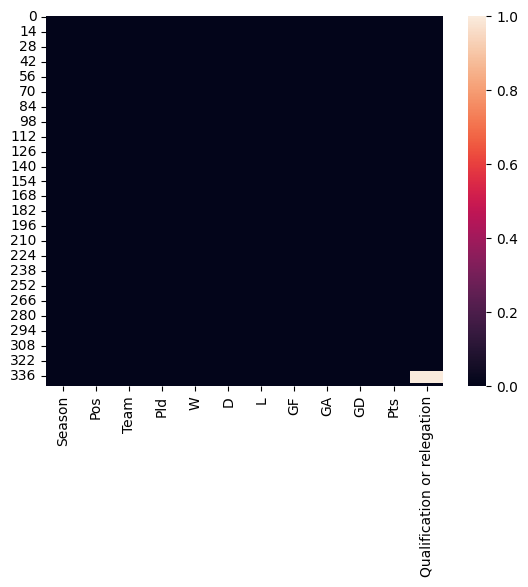

In [8]:
sns.heatmap(df.isnull())

Some nulls in data

In [9]:
df.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,8.841040,31.364162,10.777457,9.812139,10.774566,36.430636,36.323699,0.135838,42.080925
std,4.927373,3.640400,5.309511,3.380588,4.833583,12.002999,11.353317,18.948337,15.279781
min,1.000000,26.000000,0.000000,2.000000,0.000000,12.000000,0.000000,-53.000000,9.000000
25%,5.000000,30.000000,7.000000,7.000000,8.000000,28.000000,29.000000,-11.000000,32.000000
50%,9.000000,34.000000,10.000000,10.000000,11.000000,34.000000,37.000000,-2.000000,40.000000
75%,13.000000,34.000000,13.000000,12.000000,14.000000,43.000000,43.000000,9.000000,50.000000
max,20.000000,38.000000,28.000000,19.000000,30.000000,75.000000,88.000000,66.000000,89.000000


In [10]:
df.describe(include='object')

,Season,Team,Qualification or relegation
count,346,346,335
unique,21,67,27
top,2014-15,Zamalek,Not Applicable
freq,20,21,195


---
## Data Cleaning
In this stage we have 3 tasks:

1.   Rename columns
2.   Handle Null values
3. Handle inconsistency  in data values

In [11]:
# Renaming Column
df.rename(columns={'Qualification or relegation': 'Decision'}, inplace=True)

In [12]:
df[df.Decision.isna()]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Decision
332,2023-24,5,Modern Sport,34,14,12,8,40,28,12,54,NaN
333,2023-24,6,Smouha,34,15,9,10,39,35,4,54,NaN
334,2023-24,7,ZED,34,13,12,9,48,35,13,51,NaN
335,2023-24,8,Ceramica Cleopatra,34,12,10,12,51,42,9,46,NaN
336,2023-24,9,Enppi,34,11,12,11,38,37,1,45,NaN
337,2023-24,10,El Gaish,34,10,12,12,30,40,-10,42,NaN
338,2023-24,11,Al Ittihad,34,9,14,11,30,42,-12,41,NaN
339,2023-24,12,El Gouna,34,9,12,13,32,44,-12,39,NaN
340,2023-24,13,National Bank Egypt,34,9,9,16,46,45,1,36,NaN
341,2023-24,14,El Ismaily,34,7,12,15,33,43,-10,33,NaN


They are in the middle of the table then we can make them "Remains in Premiere league"

In [13]:
df.replace(np.nan,"Remains in Premiere league", inplace=True)

Looking at "Decision" column

In [14]:
df.Decision.value_counts()

,count
Decision,
Not Applicable,195
Relegation to the Second Division,58
Qualification for the Champions League,20
Qualification for the Confederation Cup,19
Remains in Premiere league,11
Qualification for CAF Champions League,4
Relegation to Egyptian Second Division,3
Qualification for the Confederation Cup first or second round,2
Qualification for the Champions League first or second round,2


Needs to normalize values

In [15]:
rel = ['Relegation to the Second Division', "Relegation to Egyptian Second Division",
       'Relegation to\xa0Egyptian Second Division', "Relegation to the\xa0Second Division"]
qualcon = ['Qualification for CAF Confederation Cup','Qualification for the\xa0Confederation Cup',
           'Qualification for the\xa0Confederation Cup\xa0first or second round','Qualification to\xa0Confederation Cup',
           "Qualification for the\xa0CAF Cup", "Qualification to Confederation Cup",
           "Qualification for 2002 African Cup Winners' Cup", "Qualification for 2002 CAF Cup",
           "Qualification for CAF Confederation cup", "Qualification for the CAF Cup",
           "Qualification for the Confederation Cup first or second round"]
qualchamp = ['Qualification for the\xa0Champions League\xa0first or second round','Qualification to\xa0Champions League',
             'Qualification for the\xa0Champions League',"Qualification for the Champions League", "Qualification for CAF Champions League",
             "Qualification for the Champions League first or second round"]
for i in range(2000, 2023):
  qualcon.append(f"Qualification for {i} CAF Confederation Cup")
  qualchamp.append(f"Qualification for {i} CAF Champions League")

In [16]:
df.loc[df['Decision'].isin(qualcon), 'Decision'] = 'Qualified for CAF Confederation cup'
df.loc[df['Decision'].isin(qualchamp), 'Decision'] = 'Qualified for CAF Champions League'
df.loc[df['Decision'].isin(rel), 'Decision'] = 'Relegated to Second Division'
df.replace("Not Applicable","Remains in Premiere league", inplace=True)
df.replace(["Mansoura", "El Mansoura"],"El Mansoura SC", inplace=True)
df.replace("Petrol Asyut", "Asyut Petroleum", inplace=True)
df.replace("Sawahel", "Haras El Hedood", inplace=True)
df.replace("ENPPI", "Enppi", inplace=True)
df.replace("El Gaish", "Tala'ea El Gaish", inplace=True)
df.replace("Al Ittihad", "Al Itthad Al Sakandary", inplace=True)
df.replace("National Bank Egypt", "National Bank of Egypt", inplace=True)
df.replace("Ismaily", "El Ismaily", inplace=True)
df.replace("Arab Contractors", "Al Mokawloon Al Arab", inplace=True)
df.replace("Baladiyyat Al-Mehalla", "Baladiyat El Mahalla", inplace=True)
df.replace("El Daklyeh", "El Dakhleya", inplace=True)

Making "Season" column has only year

In [17]:
df['Season'] = df['Season'].str[:-3].astype(int)

In [18]:
df.duplicated().sum()

0

There's no duplicates

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    346 non-null    int64 
 1   Pos       346 non-null    int64 
 2   Team      346 non-null    object
 3   Pld       346 non-null    int64 
 4   W         346 non-null    int64 
 5   D         346 non-null    int64 
 6   L         346 non-null    int64 
 7   GF        346 non-null    int64 
 8   GA        346 non-null    int64 
 9   GD        346 non-null    int64 
 10  Pts       346 non-null    int64 
 11  Decision  346 non-null    object
dtypes: int64(10), object(2)
memory usage: 32.6+ KB


<Axes: >

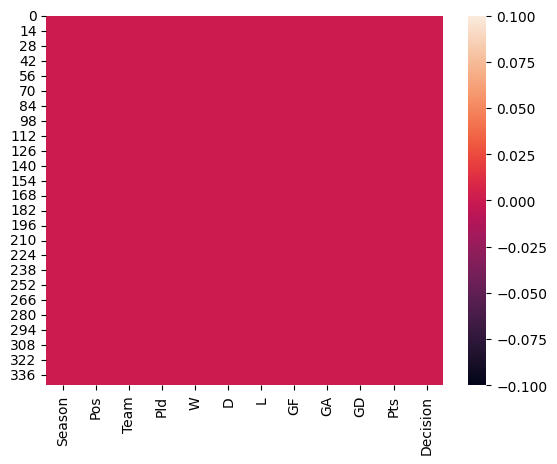

In [20]:
sns.heatmap(df.isnull())

---
## Exploring Data

Q1: The range of the Analysis?

In [21]:
df.Season.min(), df.Season.max()

(2000, 2023)

Q2: Average Played matches?

In [22]:
df.Pld.mean()

31.36416184971098

Q3: average Wins?

In [23]:
df.W.mean()

10.777456647398845

Q4: Average scored goals?

In [24]:
df.GF.mean()

36.43063583815029

Q5: Average Received goals?

In [25]:
df.GA.mean()

36.323699421965316

Q6: Average Goals Difference?

In [26]:
df.GD.mean()

0.13583815028901733

Q7: Average Points?

In [27]:
df.Pts.mean()

42.08092485549133

Q8: Minimum points?

In [28]:
df.Pts.min()

9

Q9: Maximum points

In [29]:
df.Pts.max()

89

Q10: Maximum Received & Scored goals?

In [30]:
df.GA.max(), df.GF.max()

(88, 75)

Q11: Seasons with the most scored Goals?

Season
2014    907
2020    747
2023    730
2018    729
2017    718
Name: GF, dtype: int64


Text(0, 0.5, 'Goals')

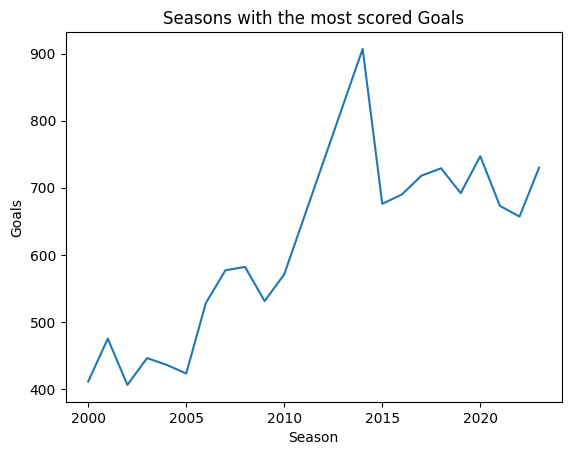

In [31]:
print(df.groupby('Season')['GF'].sum().sort_values(ascending=False)[:5])
df.groupby('Season')['GF'].sum().plot(kind='line')
plt.title('Seasons with the most scored Goals')
plt.xlabel('Season')
plt.ylabel('Goals')

Q12: Seasons with the most draw?

Season
2014    118.0
2020    112.0
2018    107.0
2021    105.0
2022    102.0
Name: D, dtype: float64


Text(0.5, 0, 'Season')

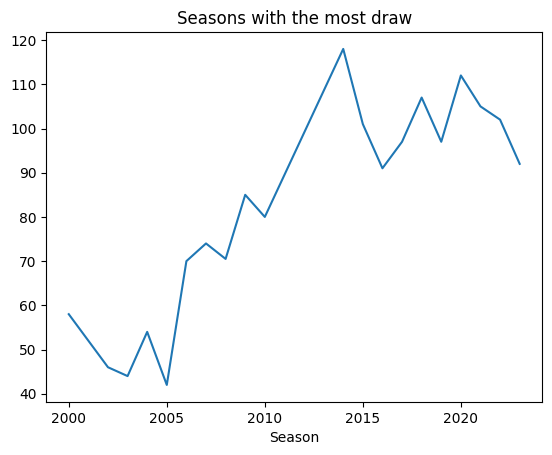

In [32]:
print((df.groupby('Season')['D'].sum()/2).sort_values(ascending=False)[:5])
(df.groupby('Season')['D'].sum()/2).plot(kind='line')
plt.title('Seasons with the most draw')
plt.xlabel('Season')

Q13: Number of matches in each Season?

Season
2014    20
2023    18
2022    18
2021    18
2020    18
Name: Season, dtype: int64


Text(0, 0.5, 'Number of matches')

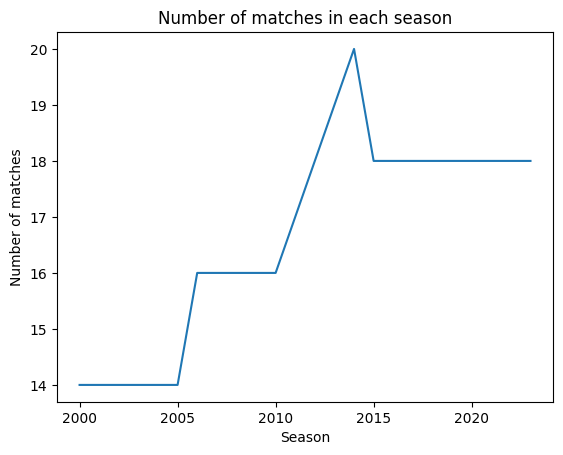

In [33]:
print(df.groupby('Season').Season.count().sort_values(ascending=False)[:5])
df.groupby('Season').Season.count().plot(kind='line')
plt.title('Number of matches in each season')
plt.xlabel('Season')
plt.ylabel('Number of matches')

Q14: Average Match Results for each Season?

Text(0.5, 1.0, 'Average match result')

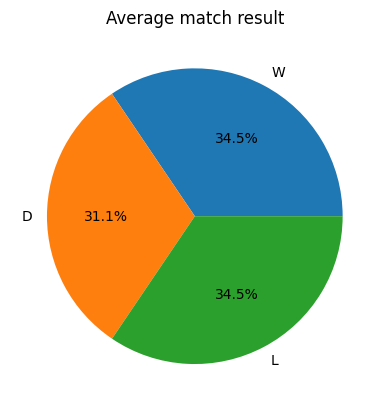

In [34]:
df.groupby('Season')[['W', 'D', 'L']].mean().mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Average match result')

Q15: Top 5 teams with the most played matches?

Team
Al Ahly                   650
Al Masry                  650
El Ismaily                650
Zamalek                   650
Al Itthad Al Sakandary    650
Name: Pld, dtype: int64


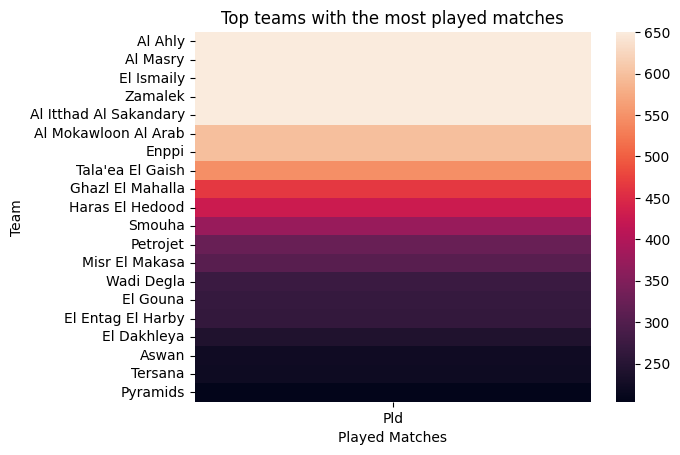

In [35]:
print(df.groupby('Team')['Pld'].sum().sort_values(ascending=False)[:5])
sns.heatmap(data=df.groupby('Team')['Pld'].sum().sort_values(ascending=False)[:20].to_frame())
plt.title('Top teams with the most played matches')
plt.xlabel('Played Matches')
plt.ylabel('Team')
plt.show()

Q16: Top 5 teams with the most wins?

Team
Al Ahly       466
Zamalek       392
El Ismaily    276
Al Masry      227
Enppi         217
Name: W, dtype: int64


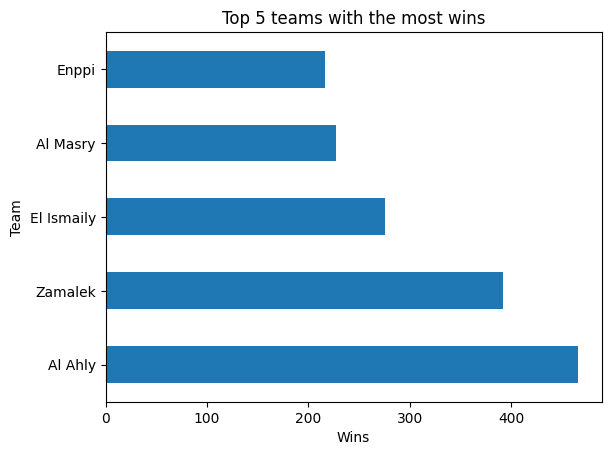

In [36]:
print(df.groupby('Team')['W'].sum().sort_values(ascending=False)[:5])
df.groupby('Team')['W'].sum().sort_values(ascending=False)[:5].plot(kind='barh')
plt.title('Top 5 teams with the most wins')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

Q17: Top 5 teams with the strongest attack?

Team
Al Ahly       1243
Zamalek       1090
El Ismaily     858
Al Masry       743
Enppi          724
Name: GF, dtype: int64


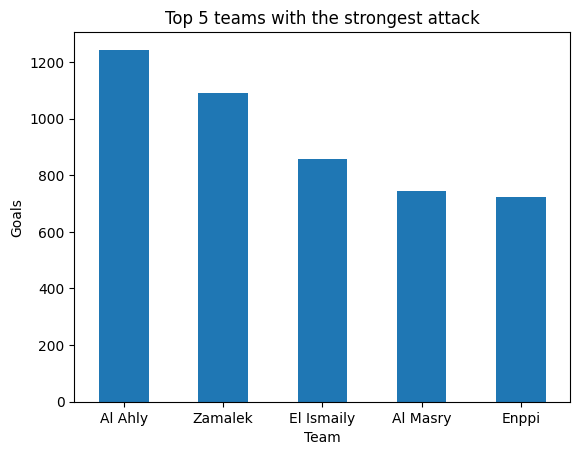

In [37]:
print(df.groupby('Team')['GF'].sum().sort_values(ascending=False)[:5])
df.groupby('Team')['GF'].sum().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Top 5 teams with the strongest attack')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.xticks(rotation=0)
plt.show()

Q18: Top 5 Teams with the Strongest Defending?

Team
Al Ahly           19.142857
El Mansoura SC    26.166667
Zamalek           26.380952
Modern Sport      28.000000
Future            28.500000
Name: GA, dtype: float64


Text(0.5, 0, 'Goals')

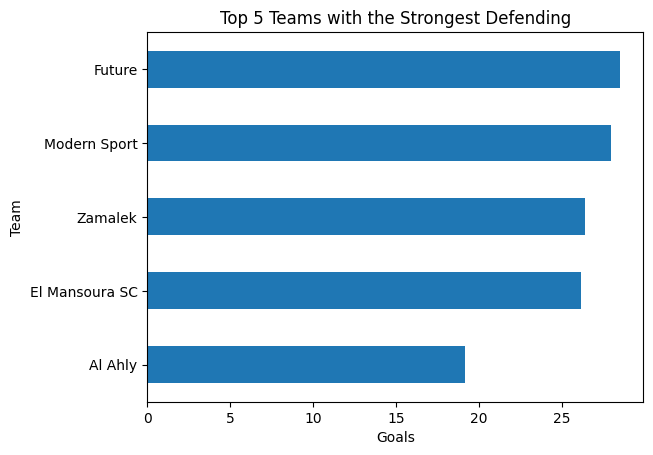

In [38]:
print(df.groupby('Team')['GA'].mean().sort_values(ascending=True)[:5])
df.groupby('Team')['GA'].mean().sort_values(ascending=True)[:5].plot(kind='barh')
plt.title('Top 5 Teams with the Strongest Defending')
plt.xlabel('Goals')

Q19: The worst 5 Teams in Defending?

Team
Ala'ab Damanhour       82.0
Al Nasr Lel Taa'den    66.0
Al Nasr                65.0
Al Assiouty Sport      64.5
FC Masr                57.0
Name: GA, dtype: float64


Text(0.5, 0, 'Goals')

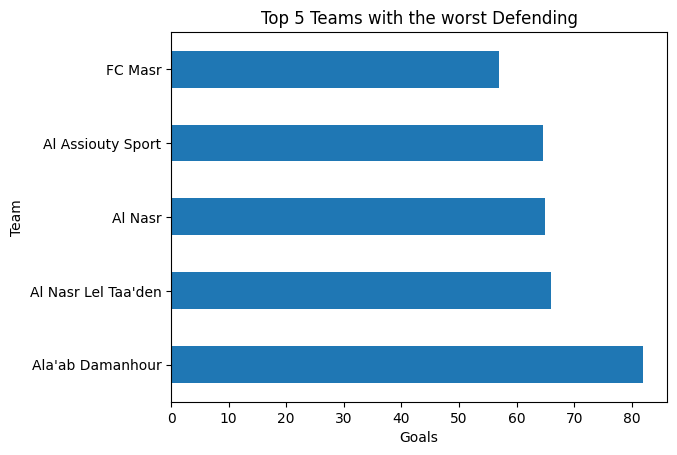

In [39]:
print(df.groupby('Team')['GA'].mean().sort_values(ascending=False)[:5])
df.groupby('Team')['GA'].mean().sort_values(ascending=False)[:5].plot(kind='barh')
plt.title('Top 5 Teams with the worst Defending')
plt.xlabel('Goals')

Q20: Top 5 Teams in Goals defference?

Team
Al Ahly     40.047619
Pyramids    27.500000
Zamalek     25.523810
ZED         13.000000
Future      13.000000
Name: GD, dtype: float64


Text(0, 0.5, 'Goals Differnece')

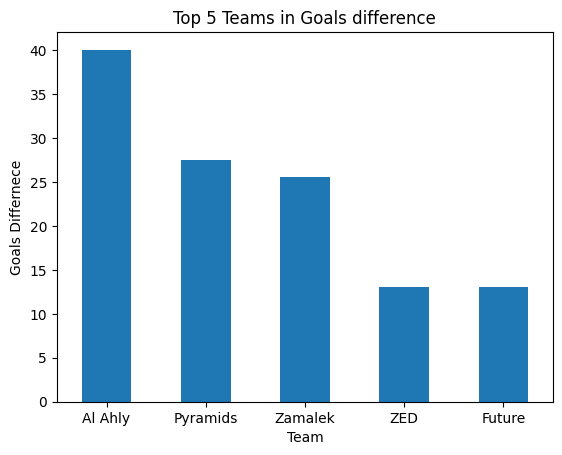

In [40]:
print(df.groupby('Team')['GD'].mean().sort_values(ascending=False)[:5])
df.groupby('Team')['GD'].mean().sort_values(ascending=False)[:5].plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Top 5 Teams in Goals difference')
plt.xlabel('Team')
plt.ylabel('Goals Differnece')

Q21: Top 5 teams in points of all times?

Team
Al Ahly       1534
Zamalek       1314
El Ismaily    1027
Al Masry       908
Enppi          865
Name: Pts, dtype: int64


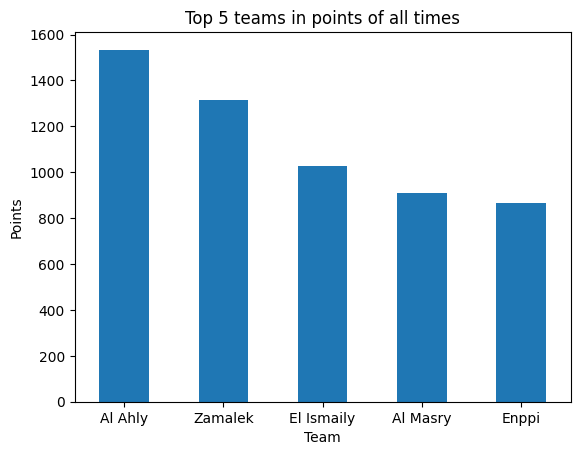

In [41]:
print(df.groupby('Team')['Pts'].sum().sort_values(ascending=False)[:5])
df.groupby('Team')['Pts'].sum().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Top 5 teams in points of all times')
plt.xlabel('Team')
plt.ylabel('Points')
plt.xticks(rotation=0)
plt.show()

Q22: Which Team get the maximum points in one season?

In [42]:
df.loc[df.Pts == df.Pts.max()]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Decision
256,2019,1,Al Ahly,34,28,5,1,74,8,66,89,Qualified for CAF Champions League


Q23: Which Team Scored the maximum Goals in one season?

In [43]:
df.loc[df.GF == df.GF.max()]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Decision
220,2017,1,Al Ahly,34,28,4,2,75,19,56,88,Qualified for CAF Champions League
328,2023,1,Al Ahly,34,27,4,3,75,28,47,85,Qualified for CAF Champions League


Q24: Top 5 Teams with win percentages?

In [44]:
for team in df.Team.unique():
  df.loc[df.Team == team, 'Win%'] = df.loc[df.Team == team, 'W']/df.loc[df.Team == team, 'Pld']*100

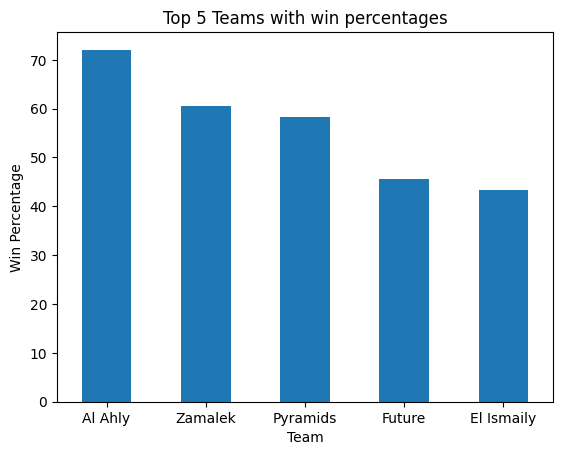

In [45]:
df.groupby('Team')['Win%'].mean().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Top 5 Teams with win percentages')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=0)
plt.show()

Q25: for each Team, how his position different by season?

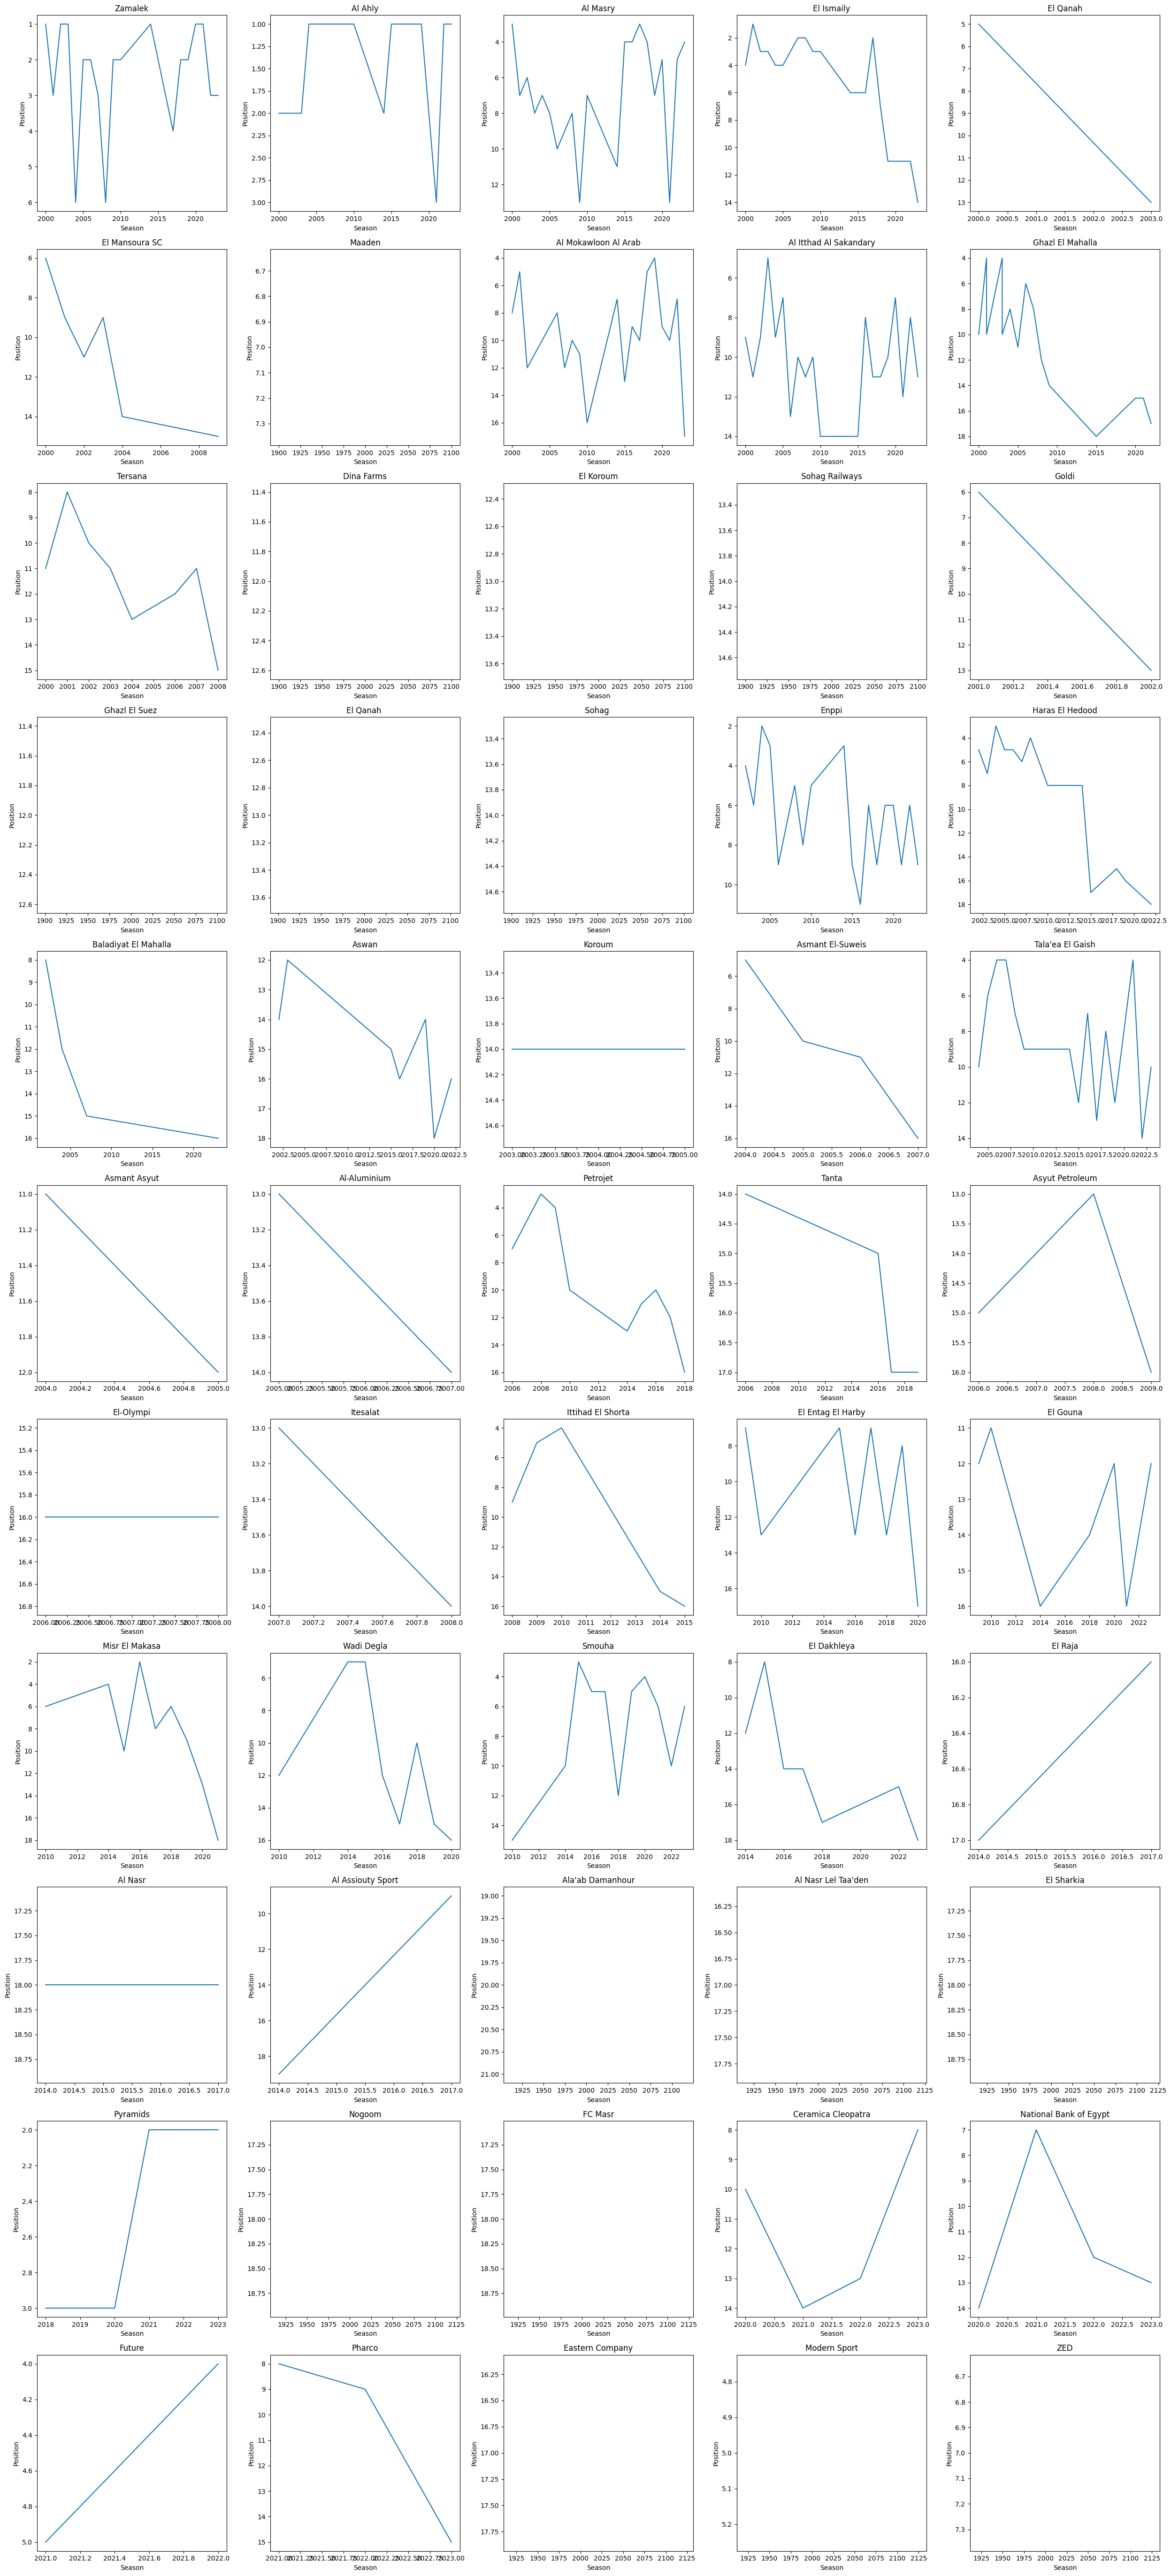

In [46]:
num_teams = len(df.Team.unique())
num_cols = 5  # Number of columns for subplots
num_rows = (num_teams + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 5))
axes = axes.flatten()

# Iterate through teams and plot on subplots
for i, team in enumerate(df.Team.unique()):
    ax = axes[i]  # Get the current subplot
    ax.plot(df[df.Team == team].Season, df[df.Team == team].Pos)
    ax.invert_yaxis()
    ax.set_title(team)
    ax.set_xlabel('Season')
    ax.set_ylabel('Position')

# Hide any unused subplots
for j in range(num_teams, num_rows * num_cols):
    axes[j].axis('off')  # Turn off axes for extra subplots

# Adjust layout and display the plot
plt.tight_layout()  # Improves spacing between subplots
plt.show()

Q26: The most qualified Team to the Caf Champions League?

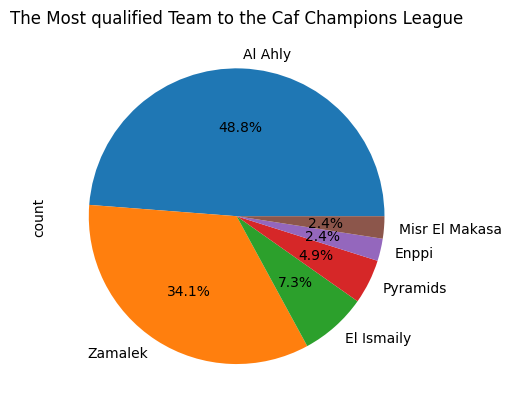

,count
Team,
Al Ahly,20
Zamalek,14
El Ismaily,3
Pyramids,2
Enppi,1
Misr El Makasa,1


In [47]:
df.loc[df.Decision == 'Qualified for CAF Champions League'].Team.value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('The Most qualified Team to the Caf Champions League')
plt.show()
df.loc[df.Decision == 'Qualified for CAF Champions League'].Team.value_counts()

Q27: Top 5 most Qualified teams for CAF Confederation cup?

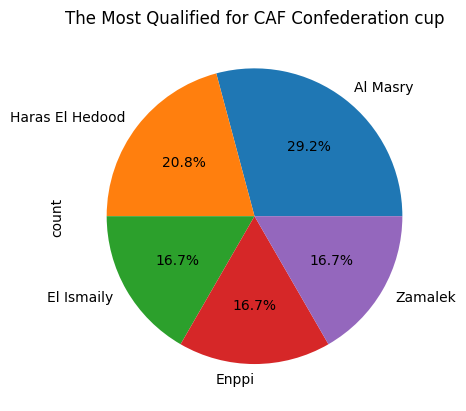

,count
Team,
Al Masry,7
Haras El Hedood,5
El Ismaily,4
Enppi,4
Zamalek,4


In [48]:
df.loc[df.Decision == 'Qualified for CAF Confederation cup'].Team.value_counts()[:5].plot(kind='pie', autopct = '%1.1f%%')
plt.title('The Most Qualified for CAF Confederation cup')
plt.show()
df.loc[df.Decision == 'Qualified for CAF Confederation cup'].Team.value_counts()[:5]

Q28: Top 5 teams remainig in the league?

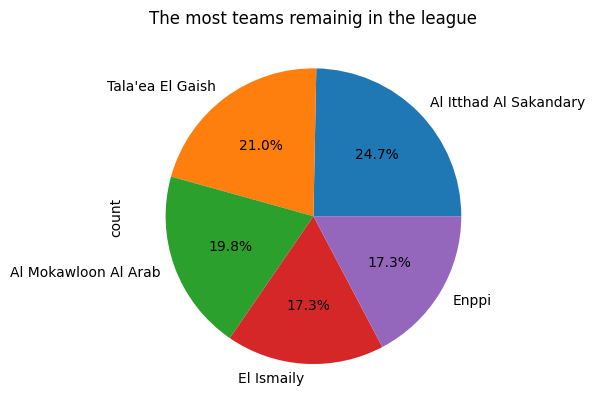

,count
Team,
Al Itthad Al Sakandary,20
Tala'ea El Gaish,17
Al Mokawloon Al Arab,16
El Ismaily,14
Enppi,14


In [49]:
df[df.Decision == 'Remains in Premiere league'].Team.value_counts().sort_values(ascending=False)[:5].plot(kind='pie', autopct = '%1.1f%%')
plt.title('The most teams remainig in the league')
plt.show()
df[df.Decision == 'Remains in Premiere league'].Team.value_counts().sort_values(ascending=False)[:5]

Q29: Most teams relegating to the 2nd division?

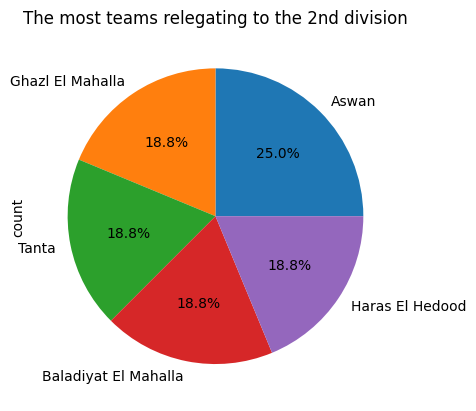

,count
Team,
Aswan,4
Ghazl El Mahalla,3
Tanta,3
Baladiyat El Mahalla,3
Haras El Hedood,3


In [50]:
df[df.Decision == "Relegated to Second Division"].Team.value_counts().sort_values(ascending=False)[:5].plot(kind='pie', autopct = '%1.1f%%')
plt.title('The most teams relegating to the 2nd division')
plt.show()
df[df.Decision == "Relegated to Second Division"].Team.value_counts().sort_values(ascending=False)[:5]

Q30: Worst 5 teams in win percentages?

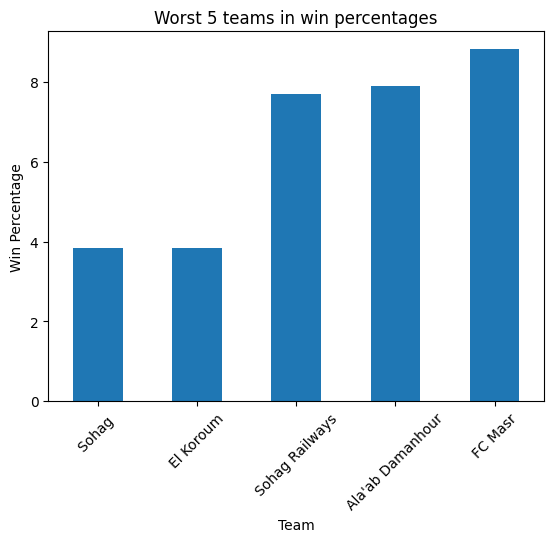

,Win%
Team,
Sohag,3.846154
El Koroum,3.846154
Sohag Railways,7.692308
Ala'ab Damanhour,7.894737
FC Masr,8.823529


In [51]:
df.groupby('Team')['Win%'].mean().sort_values(ascending=True)[:5].plot(kind='bar')
plt.title('Worst 5 teams in win percentages')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()
df.groupby('Team')['Win%'].mean().sort_values(ascending=True)[:5]